<a href="https://colab.research.google.com/github/Shailendradandre/shailendra/blob/main/Diabetes_preprocessing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 

# Libraries to help with data visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric
plt.style.use('ggplot')
print('Load Libraries-Done')

Load Libraries-Done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Read and understand data**

In [ ]:
sd = pd.read_csv('/content/drive/MyDrive/project file/diabetes.csv')

In [ ]:
sd.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [ ]:
sd.shape

(768, 9)

In [ ]:
sd.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

**There are no missing values in the dataset.**

In [ ]:
#Check datatyp
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [ ]:
# Summary of the dataset
sd.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
#  count of unique values
print(sd.nunique())

pregnancies                  17
glucose                     136
bloodpressure                47
skinthickness                51
insulin                     186
bmi                         248
diabetespedigreefunction    517
age                          52
outcome                       2
dtype: int64


# **Observations**
* Data set contains women with an average of 4pregnancies and maximum of 17.
* Features like Glucose, BloodPressure, SkinThickness, and Insulin have minimum values as 0 which might be data input errors and should explore it further.
*  Difference between maximum value for features like SkinThickness, Insulin and Age and 3rd quartile which suggest ,there might be outliers present in the data.
* Average age of women in the dataset is33 years and median is29.

# **Exploratory Data Analysis**

In [ ]:
def dist_box(sd):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=sd.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=sd.mean()
    median=sd.median()
    mode=sd.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=sd,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.distplot(sd,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

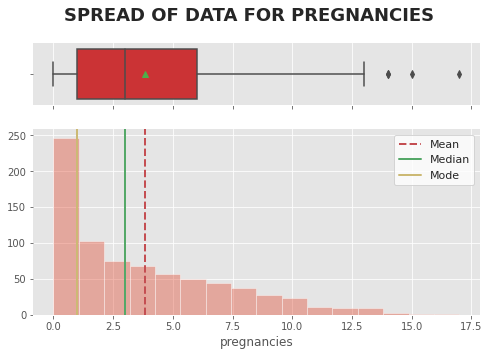

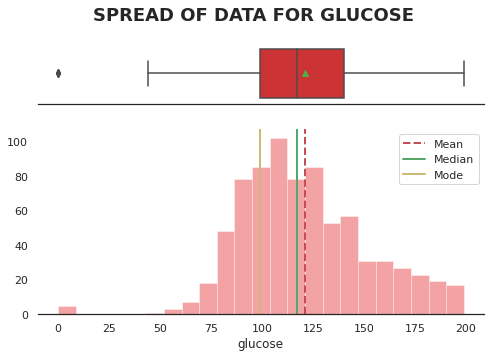

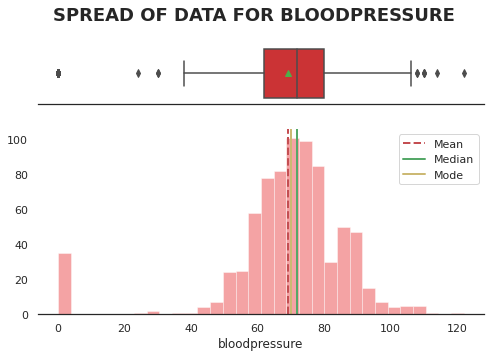

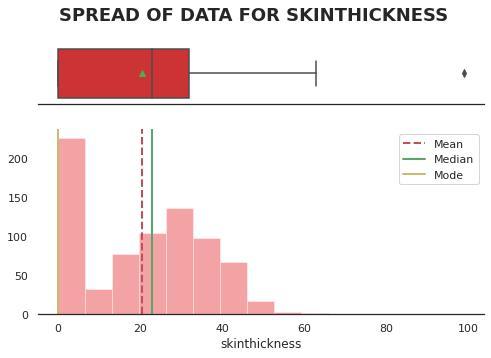

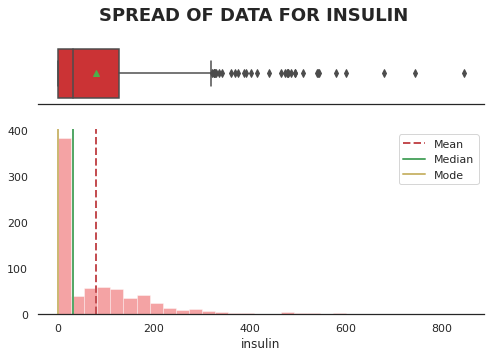

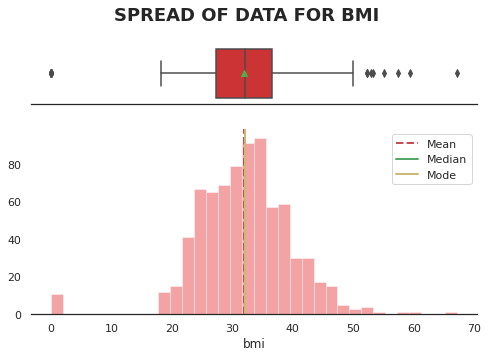

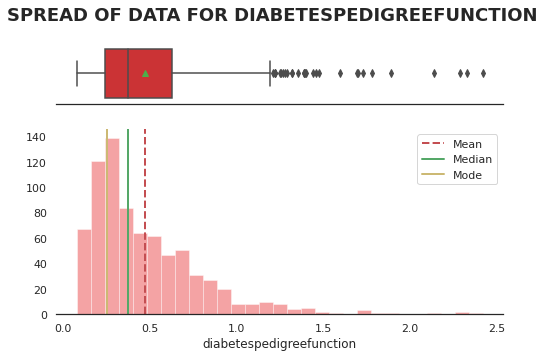

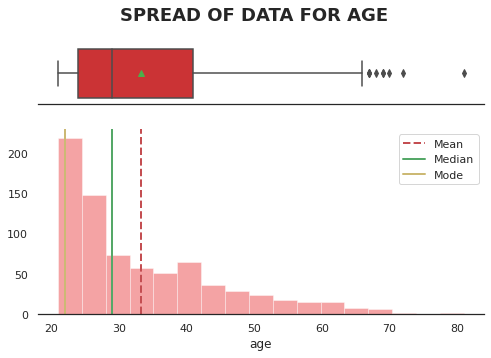

In [ ]:
list_col= sd.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(sd[list_col[i]])

# **Bivariate Analysis**

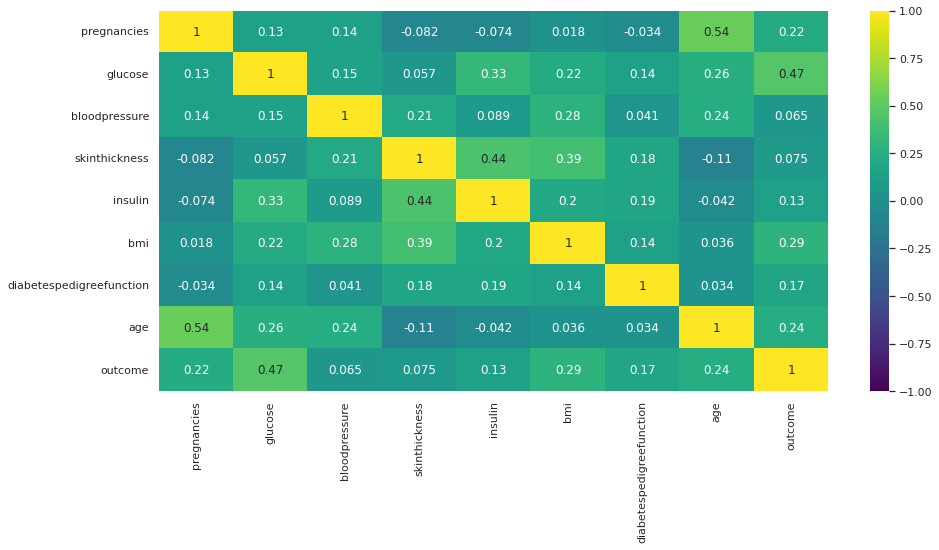

In [ ]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(15,7))
sns.heatmap(sd.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')
plt.show()

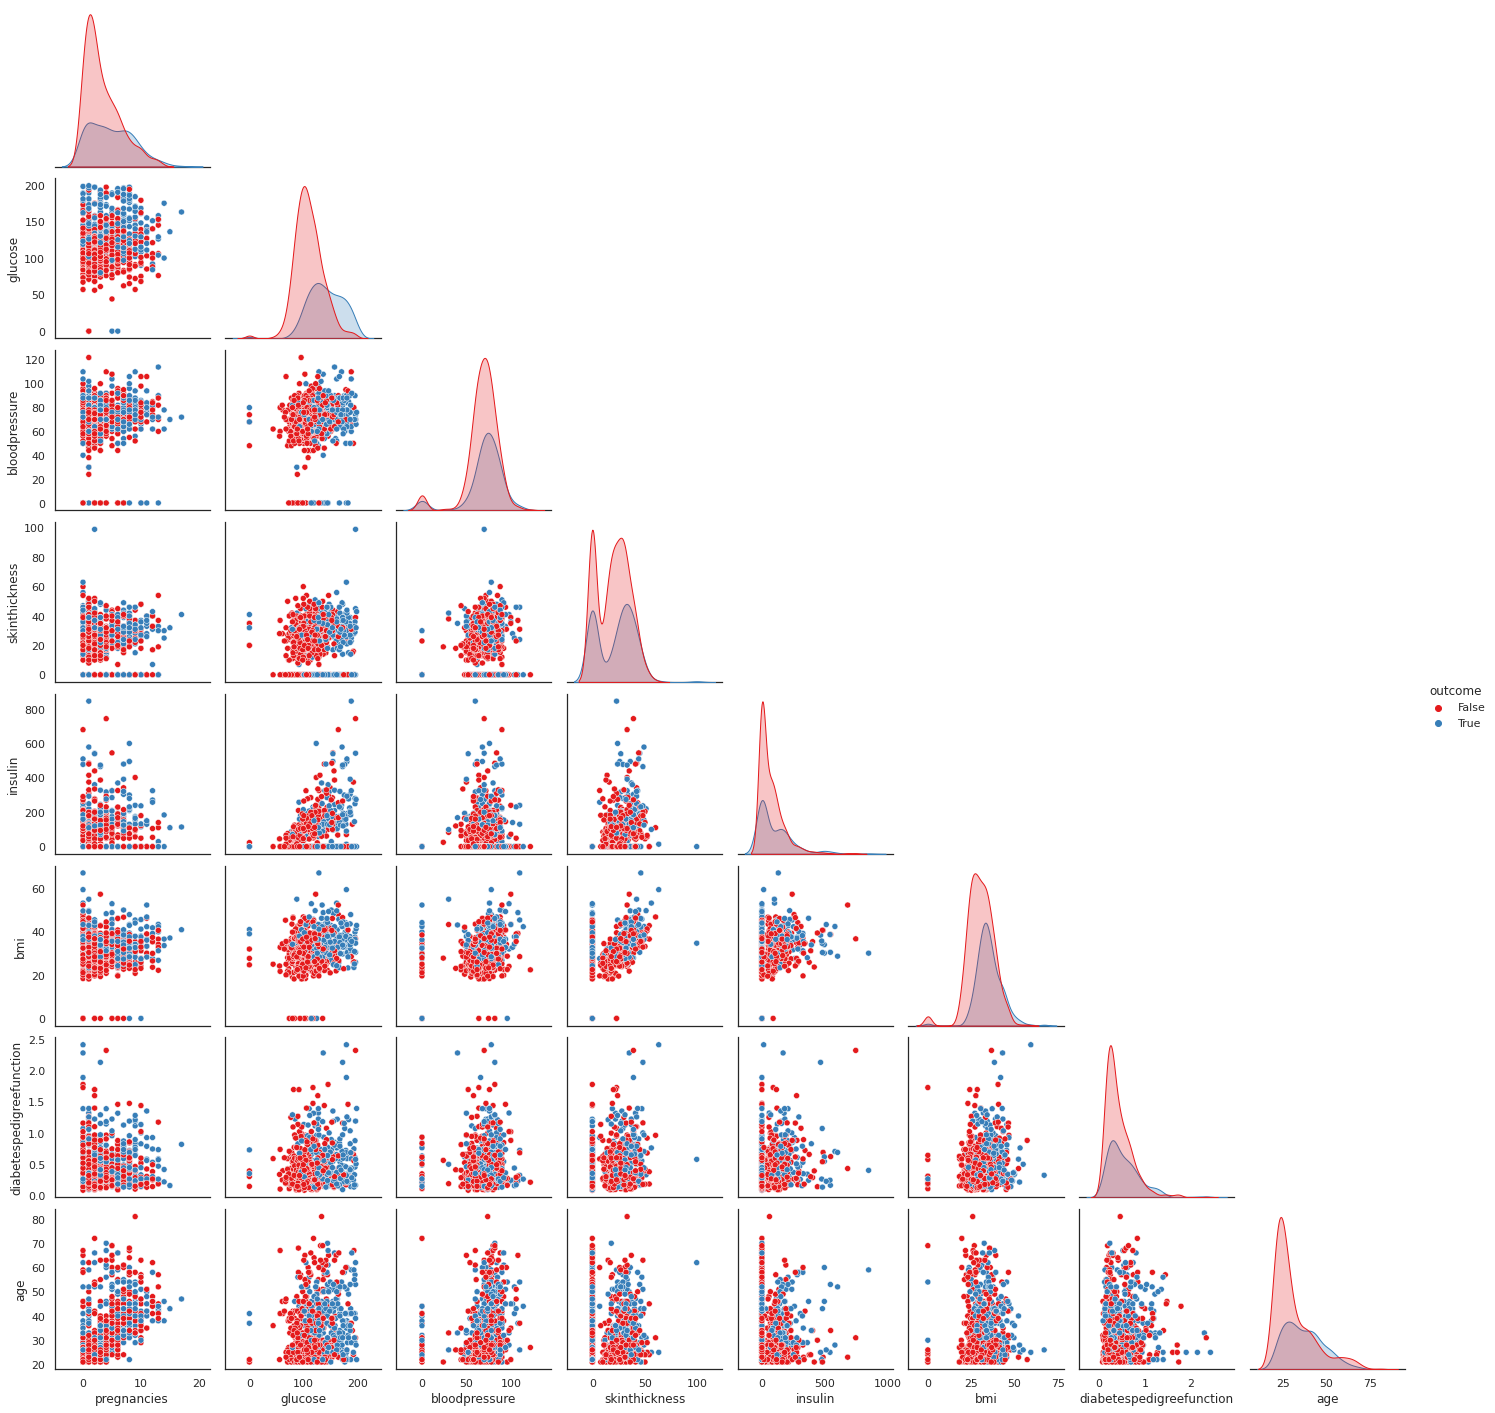

In [ ]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(data=sd,hue="outcome",corner=True)
plt.show()

In [ ]:
sd.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



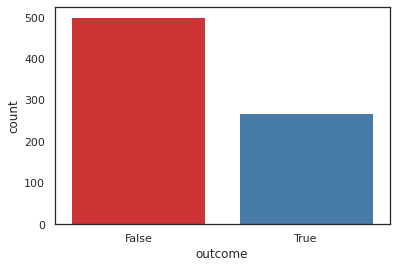

In [ ]:
sns.countplot(sd.outcome);

In [ ]:
print(sd.shape)
print(sd.ndim)
print(sd.ndim)

(768, 9)
2
2


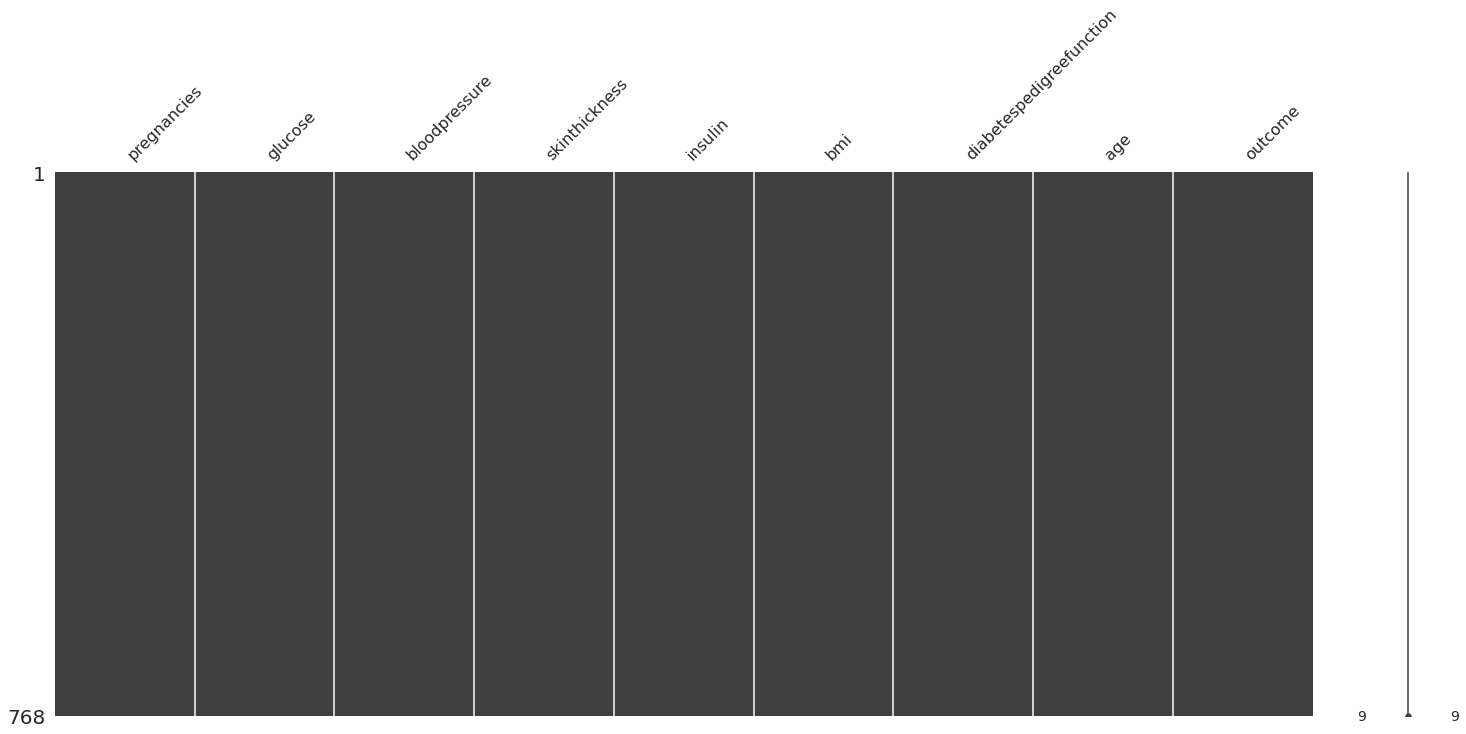

In [ ]:
import missingno as msno
msno.matrix(sd);

In [ ]:
x = sd.drop(["outcome"],axis = 1)

In [ ]:
y = sd.outcome

# **Normalization**

#**PCA,Standart Scaler, Preprocessing etc.**

In [ ]:
x = (x-np.min(x))/(np.max(x)-np.min(x)).values

In [ ]:
x.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# ***Train-test splitting***

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

# **Model Selection**

# ***1) Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
sd_reg = LogisticRegression()
sd_reg.fit(x_train, y_train)
sd_reg

LogisticRegression()

In [ ]:
#sd_reg.intercept_
#sd_reg.coef_

In [ ]:
y_pred = sd_reg.predict(x_test)
y_pred[0:10]

array([ True, False, False, False, False, False, False, False,  True,
       False])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(["y_pred"])
LabelEncoder()
list(le.classes_)
['y_pred']
le.transform(["y_pred"])
a = np.array([1,0])
list(le.fit_transform([1,0]))
np.array([1,0])
list(le.inverse_transform([1 ,0]))
([1 , 0])

[1, 0]

# **Proba values - probability**

In [ ]:
sd_prob = sd_reg.predict_proba(x_test)[:,1]


In [ ]:
y_pred = [1 if i >0.45 else 0 for i in sd_prob]
y_pred[:10]


[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
log_score = accuracy_score(y_test,y_pred)
print ("log score=",log_score)

log score= 0.7402597402597403


# ***Accuracy Score***

In [ ]:
from sklearn import metrics 
from sklearn.metrics import accuracy_score

In [ ]:
log_score = accuracy_score(y_test, y_pred)
print('log_score=', log_score)

log_score= 0.7402597402597403


In [ ]:
confusion_matrix(y_test,y_pred)

array([[85, 19],
       [21, 29]])

In [ ]:
y_pred = [1 if i >0.52 else 0 for i in sd_prob]
y_pred[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

# **2) Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
sd_for = RandomForestClassifier().fit(x_train,y_train)
sd_for

RandomForestClassifier()

In [ ]:
y_pred = sd_for.predict(x_test)

In [ ]:
sd_score = accuracy_score(y_test,y_pred)
sd_score

0.7402597402597403

# ***Importance***

Text(0.5, 0, 'Değişken Önem Düzeyleri')

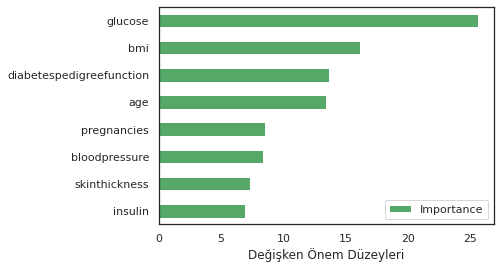

In [ ]:
Importance = pd.DataFrame({"Importance": sd_for.feature_importances_*100},index = x_train.columns)
Importance.sort_values(by = "Importance",axis = 0, ascending = True).plot(kind ="barh", color = "g")
plt.xlabel("Değişken Önem Düzeyleri")

# ***3) KNN model***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
sd_knn_score = accuracy_score(y_test,y_pred)
sd_knn_score

0.7467532467532467

In [ ]:
confusion_matrix(y_test,y_pred)


array([[89, 15],
       [24, 26]])

# ***Model Tuning***

In [ ]:
knn_params = {"n_neighbors":np.arange(1,50)}
knn =KNeighborsClassifier()
knn_cv = GridSearchCV(knn,knn_params,cv = 10)
knn_cv = knn_cv.fit(x_train,y_train)

In [ ]:
print("Best Score:"+str(knn_cv.best_score_))
print("Best Parameters:"+str(knn_cv.best_params_))

Best Score:0.7572448439978847
Best Parameters:{'n_neighbors': 47}


In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=1)
knn_final.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_final.predict(x_test)
knn_fscore = accuracy_score(y_test,y_pred)
knn_fscore

0.7142857142857143

In [ ]:
confusion_matrix(y_test,y_pred)

array([[83, 21],
       [23, 27]])

# ***4) SVM - Support Vector Machine***

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(C=7,degree=9,kernel = 'poly').fit(x_train,y_train)
svm_model

SVC(C=7, degree=9, kernel='poly')

In [ ]:
y_pred = svm_model.predict(x_test)
svm_score = accuracy_score(y_test,y_pred)
svm_score

0.7207792207792207

In [ ]:
confusion_matrix(y_test,y_pred)


array([[83, 21],
       [22, 28]])

# ***5) Gaussian Naive Bayes Model***

In [ ]:
from sklearn.naive_bayes import GaussianNB
SD = GaussianNB()
SD_model = SD.fit(x_train, y_train)
SD_model

GaussianNB()

In [ ]:
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [ ]:
SD_model.predict(x_test)[:10]

array([ True, False, False, False, False, False,  True, False,  True,
       False])

In [ ]:
SD_model.predict_proba(x_test)[0:10]  

array([[0.17212317, 0.82787683],
       [0.98488042, 0.01511958],
       [0.77775483, 0.22224517],
       [0.76491291, 0.23508709],
       [0.88364106, 0.11635894],
       [0.93349592, 0.06650408],
       [0.36493344, 0.63506656],
       [0.98913392, 0.01086608],
       [0.39642339, 0.60357661],
       [0.98435174, 0.01564826]])

In [ ]:
y_pred = SD_model.predict(x_test)
SD_score = accuracy_score(y_test, y_pred)
print("NB_class_SCORE = ", SD_score)  

NB_class_SCORE =  0.7402597402597403


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(SD_model, x_test, y_test, cv = 20).mean() 

0.7366071428571429

In [ ]:
indexx = ["Log","RF","KNN","SVM","NB"]
regressions = [log_score,SD_score,knn_fscore,svm_score,SD_score]

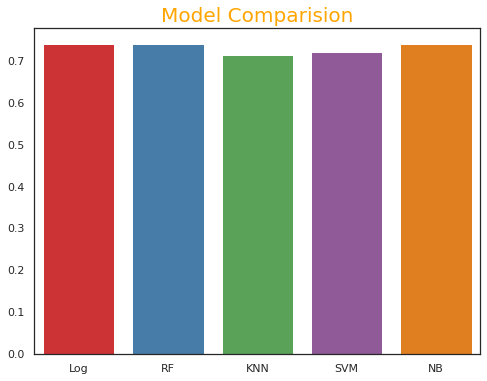

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);

In [ ]:
indexx = ["Log","RF","KNN","SVM","NB"]
regressions = [log_score,SD_score,knn_fscore,svm_score,SD_score]

import plotly.express as px

fig = px.pie(sd, values=regressions, names=indexx, title='Regression Score Results')
fig.show()